1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

In [3]:
!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv

--2023-12-06 10:06:54--  https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/aamg1apjhclecka/regression_generated.csv [following]
--2023-12-06 10:06:55--  https://www.dropbox.com/s/raw/aamg1apjhclecka/regression_generated.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc525d0f503e73aa3b3e5a1194f7.dl.dropboxusercontent.com/cd/0/inline/CI6moJ6fZansTgSlPsQfQ0g48dLi3KbaqGkWW8gvxZtz3JHgcntuUWCi3zv5TTihfISsVVxBbPtoe0R_x7slbVx86WztUBP6A_YDoshJz4fPS2S7oiDh9XdAGPWVLTMALUM/file# [following]
--2023-12-06 10:06:55--  https://uc525d0f503e73aa3b3e5a1194f7.dl.dropboxusercontent.com/cd/0/inline/CI6moJ6fZansTgSlPsQfQ0g48dLi3KbaqGkWW8gvxZtz3JHgcntuUWCi3zv5TTihfISsVVxBbPtoe0R_x7slbVx

In [4]:
import pandas as pd
df = pd.read_csv('/content/regression_generated.csv')
df

,label,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,...,features_11,features_12,features_13,features_14,features_15,features_16,features_17,features_18,features_19,features_20
0,-89.243497,2.175170,-0.285786,-0.603396,-0.627453,-0.686474,0.381067,0.306205,-0.637447,-1.332087,...,1.290725,1.047483,-1.055467,0.853204,0.038665,-0.752959,0.577920,-0.657400,1.367308,0.570199
1,230.050125,1.481941,-1.327870,-0.543583,-0.303578,1.552964,0.549738,-0.763094,-0.455796,2.053388,...,-1.761306,-0.934284,-1.050999,0.444026,-0.037959,1.061624,-1.569870,2.410696,1.113594,2.329479
2,-286.844411,-1.154394,-0.178649,-1.636646,0.239353,-0.684994,0.587201,-0.209564,-0.428956,-0.757998,...,0.374645,-1.702189,-0.014514,-0.711557,-0.558523,-1.204526,0.234989,0.398384,-0.236555,0.642003
3,364.552862,0.197665,1.455707,1.562205,2.168207,0.053335,0.790492,-0.212023,-1.142483,-1.124906,...,0.712160,-2.844936,0.483994,-0.694294,1.349605,-1.303414,0.161987,0.754084,1.248258,-1.466045
4,515.460006,0.596676,0.969860,1.294158,-0.404728,2.145297,0.997481,-0.541670,-0.952850,-0.592084,...,-1.347072,0.243422,0.290336,0.798331,0.876428,-0.366807,-0.119534,0.892320,-0.806912,0.736080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-328.100239,-1.820929,1.358539,-2.494838,0.828299,0.199255,0.142303,-0.582563,0.472356,-1.411304,...,-1.062502,2.299985,-0.085065,0.357165,-1.400150,-0.976176,-0.796009,-0.148662,0.978054,-0.804272
1996,-62.960036,-0.883712,-0.063687,-0.418704,-0.872601,0.363769,-0.368570,-0.104321,-2.493615,-1.694770,...,-0.197659,-0.533637,-0.598431,-0.039737,1.882953,-1.837356,0.583887,0.603931,-0.356482,0.029355
1997,-90.262252,-0.021394,-0.312864,-0.730848,-1.341482,-0.720862,-0.683872,-0.805370,-0.521334,-0.074645,...,1.899276,0.417949,0.324229,0.448252,-0.282110,-2.320763,1.484126,0.392324,-1.116838,-0.459027
1998,-74.333901,-0.041909,-0.862731,-1.232011,1.268843,0.093043,1.684069,0.753851,-0.537096,-0.971790,...,1.401321,-0.933149,-0.166864,1.152448,1.605114,-1.339651,0.105628,0.676177,-0.035598,-1.329490


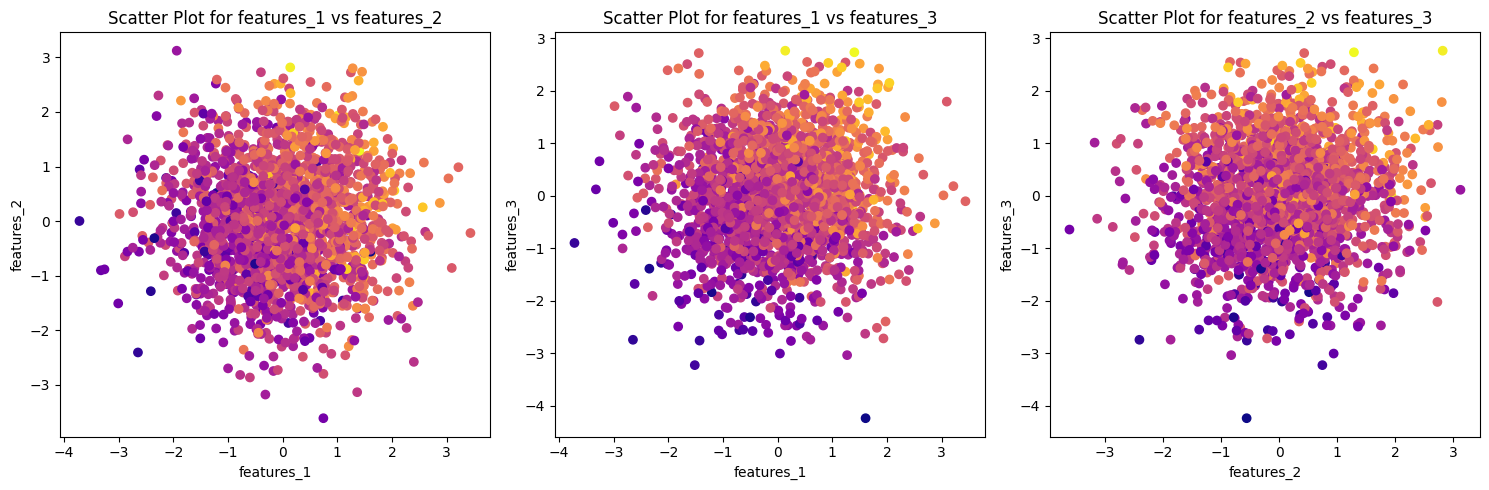

In [5]:
import matplotlib.pyplot as plt
from itertools import combinations

features = df.columns[1:4]

combinations_of_features = list(combinations(features, 2))

num_cols = len(combinations_of_features)
fig, axes = plt.subplots(1, num_cols, figsize=(15, 5))

for i, combination in enumerate(combinations_of_features):
    col = i % num_cols
    axes[col].scatter(df[combination[0]], df[combination[1]], c=df['label'], cmap='plasma')
    axes[col].set_xlabel(combination[0])
    axes[col].set_ylabel(combination[1])
    axes[col].set_title(f'Scatter Plot for {combination[0]} vs {combination[1]}')

# Adjust layout
plt.tight_layout()
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

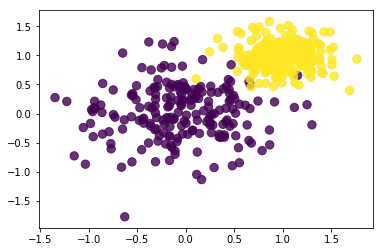

In [ ]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

<function matplotlib.pyplot.show(close=None, block=None)>

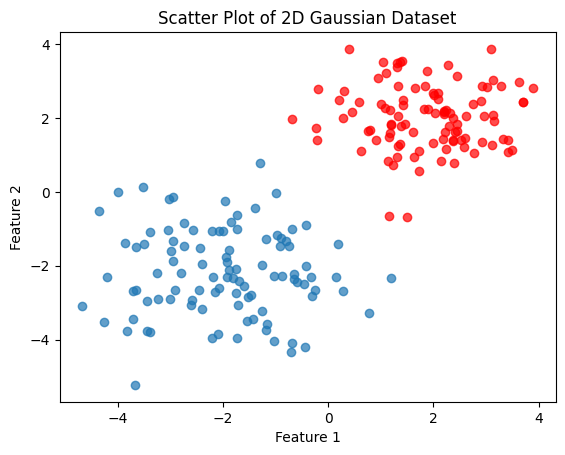

In [30]:
import numpy as np
def generate2dDataset():
  firstSample = np.random.multivariate_normal([2, 2],1*np.eye(2) , 100)
  secondSample = np.random.multivariate_normal( [-2, -2],1.5*np.eye(2) , 100)
  dataset = np.vstack([firstSample, secondSample])
  labels = np.concatenate([ np.array([0] * 100),np.array([1] * 100)])
  return dataset, labels

dataset, labels = generate2dDataset()
plt.scatter(dataset[labels == 0, 0], dataset[labels == 0, 1], label='Category 0',color='red', alpha=0.7)
plt.scatter(dataset[labels == 1, 0], dataset[labels == 1, 1], label='Category 1', alpha=0.7)

# Set labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of 2D Gaussian Dataset')
plt.show

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression.

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [13]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl

--2023-12-06 10:18:26--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2023-12-06 10:18:26--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc333999e73ec8b92a185b2c1864.dl.dropboxusercontent.com/cd/0/inline/CI7Z8gqXIoO9ZZaSA86fvDR3QZMnXZkokZgC-0fjhJyEwO4iAxmxXN4yPVkTjedfP2nVUk0fLU8QOaFGGiBSWF_GqkzUSI9nV9SHX9YBf9MV_v1YFVuB1BZcQXkvMr4nUZg/file# [following]
--2023-12-06 10:18:26--  https://uc333999e73ec8b92a185b2c1864.dl.dropboxusercontent.com/cd/0/inline/CI7Z8gqXIoO9ZZaSA86fvDR3QZMnXZkokZgC-0fjhJyEwO4iAxmxXN4yPVkTjedfP2nVUk0fLU8QOaFGGiBSWF_GqkzUSI9nV9SHX9YBf9MV

Correlation between 'distances' and 'residuals': 0.04340351052255908


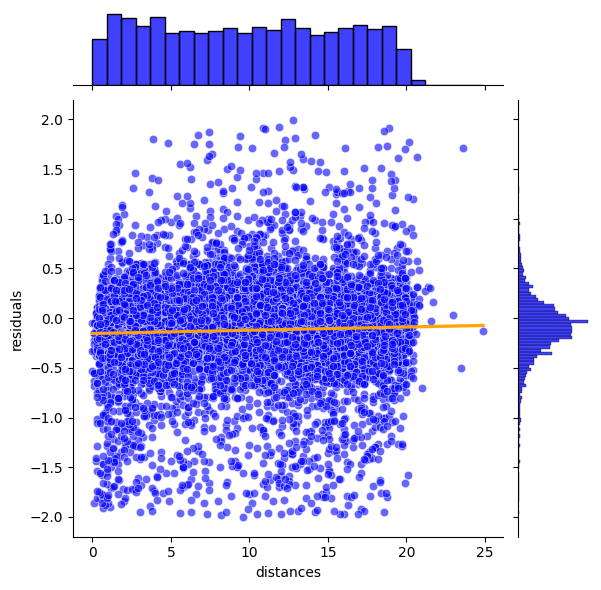

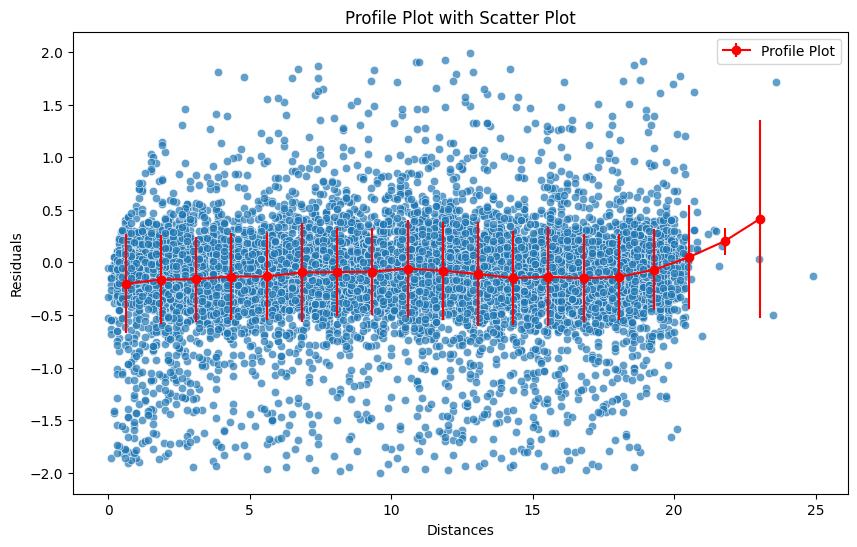

In [46]:
import seaborn as sns

data = pd.read_pickle('/content/residuals_261.pkl')
data = pd.DataFrame(data.tolist())

cleaned_data = data[np.abs(data['residuals']) < 2]
sns.jointplot(x='distances', y='residuals', data=cleaned_data, color='blue',alpha=0.6)
sns.regplot(x='distances', y='residuals', data=cleaned_data, scatter=False, color='orange')

correlation = cleaned_data['distances'].corr(cleaned_data['residuals'])
print(f"Correlation between 'distances' and 'residuals': {correlation}")

num_bins = 20
bins = np.linspace(cleaned_data['distances'].min(), cleaned_data['distances'].max(), num_bins + 1)

x = (bins[:-1] + bins[1:]) / 2
y = []
err_y = []

for i in range(num_bins):
    bin_mask = (cleaned_data['distances'] >= bins[i]) & (cleaned_data['distances'] < bins[i + 1])
    residuals_in_bin = cleaned_data.loc[bin_mask, 'residuals']

    y.append(np.mean(residuals_in_bin))
    err_y.append(np.std(residuals_in_bin))

x = np.array(x)
y = np.array(y)
err_y = np.array(err_y)

plt.figure(figsize=(10, 6))

sns.scatterplot(x='distances', y='residuals', data=cleaned_data, alpha=0.7)

plt.errorbar(x, y, yerr=err_y, fmt='o-', color='red', label='Profile Plot')

plt.xlabel('Distances')
plt.ylabel('Residuals')
plt.title('Profile Plot with Scatter Plot')


plt.legend()
plt.show()

##**Comment About Correlation of 2 features:**

Correlation between 'distances' and 'residuals' ~= **0.043**

The positive sign indicates that as the 'distances' variable increases, the 'residuals' variable tends to increase slightly. However, the strength of this relationship is weak.

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


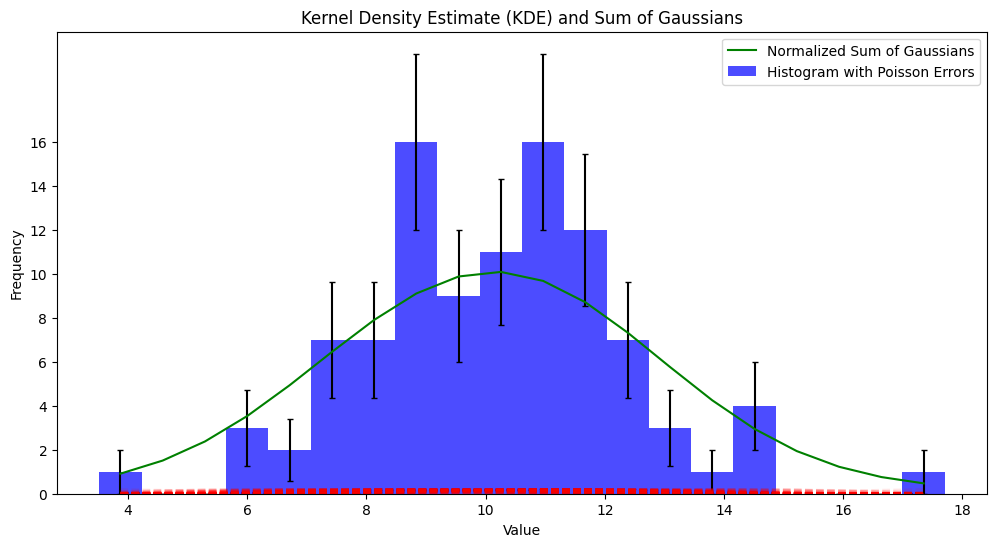

In [51]:
from scipy.stats import norm
from scipy.integrate import trapz

sample_size = 100
mean = 10
std_dev = 2

data = np.random.normal(mean, std_dev, sample_size)
hist, bin_edges = np.histogram(data, bins=20, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_width = bin_edges[1] - bin_edges[0]
poisson_errors = np.sqrt(hist)

plt.figure(figsize=(12, 6))
plt.bar(bin_centers, hist, width=bin_width, color='blue', alpha=0.7, label='Histogram with Poisson Errors')
plt.errorbar(bin_centers, hist, yerr=poisson_errors, fmt='none', ecolor='black', capsize=2)

std_dev_factor = 1.06 * data.std() * data.size**(-1/5)
gaussian_sum = np.zeros_like(bin_centers)

for xi in data:
    gauss = norm.pdf(bin_centers, loc=xi, scale=std_dev_factor * data.std())
    plt.plot(bin_centers, gauss, 'r--', alpha=0.1)
    gaussian_sum += gauss

area_hist = trapz(hist, x=bin_centers)
area_gauss_sum = trapz(gaussian_sum, x=bin_centers)
gaussian_sum_normalized = gaussian_sum * (area_hist / area_gauss_sum)
plt.plot(bin_centers, gaussian_sum_normalized, color='green', label='Normalized Sum of Gaussians')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Kernel Density Estimate (KDE) and Sum of Gaussians')
plt.legend()

plt.yticks(np.arange(0, max(hist) + 2, 2))
plt.show()